<a href="https://colab.research.google.com/github/Ayush123-prog/movies-dataset/blob/master/ML_MINOR_MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [5]:
downloaded = drive.CreateFile({'id':'1ohmub1Bs2WJPYgnG5khfONScgQ8KZYuV'}) # replace the id with id of file you want to access
downloaded.GetContentFile('tmdb-movies.csv') 



#**Project: Investigate a Dataset (TMDb Movie Data)**


> The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This contain four parts:

##**Table of Contents**



*   Introduction
*   Data Wrangling

*   Exploratory Data Analysis
*   Conclusions









#**Introduction**

##**Dataset**

*   I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.



> **Contain:**



*   Total Rows = 10866
*   Total Columns = 21

*   After Seeing the dataset we can say that some columns contains null values




##***QUESTIONS***


> 

1.   Which year has the highest release of movies?
2.   Which movie had the most profit during the years 2000-2005? 

1.   Which are the movies with the second lowest and second highest budget?
2.   Which are the movies with the most and least earned revenues?

1.   What is the average runtime of movies in the year 2000?











In [6]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from wordcloud import WordCloud,STOPWORDS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#DATA WRANGLING



> After Observing the dataset and the questions related to this dataset for the analysis we will be keeping only relevent data and deleting the unused data.



In [50]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Read the CSV File Using Pandas read_csv function
import pandas as pd
df = pd.read_csv('tmdb-movies.csv') 
print(df.head(2))

       id    imdb_id  popularity  ...  release_year    budget_adj   revenue_adj
0  135397  tt0369610   32.985763  ...          2015  1.379999e+08  1.392446e+09
1   76341  tt1392190   28.419936  ...          2015  1.379999e+08  3.481613e+08

[2 rows x 21 columns]


In [ ]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
#print concise summery of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
#print the third and zeroth row
df.loc[[3,0]]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [ ]:
df.iloc[2]

id                                                                 262500
imdb_id                                                         tt2908446
popularity                                                        13.1125
budget                                                          110000000
revenue                                                         295238201
original_title                                                  Insurgent
cast                    Shailene Woodley|Theo James|Kate Winslet|Ansel...
homepage                   http://www.thedivergentseries.movie/#insurgent
director                                                 Robert Schwentke
tagline                                        One Choice Can Destroy You
keywords                based on novel|revolution|dystopia|sequel|dyst...
overview                Beatrice Prior must confront her inner demons ...
runtime                                                               119
genres                                

In [ ]:
##since the dataset contain null values also 
#count total rows in each column which contain null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
#fill the null values with zero using 'fillna' function
#I don't want to update it with zero because some rows also contain string values.
df.fillna(0)
print()

#Data Cleaning(Removing the unused info from the dataset)





> Information That We Need To Delete Or Modify¶

1.  We need to remove duplicate rows from the dataset
2.  Changing format of release date into datetime format
3.  Remove the unused colums that are not needes in the analysis process.
4.  Remove the movies which are having zero value of budget and revenue.



1.**Remove Duplicate Rows**

In [8]:
#'duplicated()' function in pandas return the duplicated row as True and others as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

1

In [51]:
#After calculating the duplicate row we can drop these row using 'drop_duplicates()' function
df.drop_duplicates(inplace=True)
#after removing duplicate value from the dataset
print("After removing Duplicated values (rows,columns): " ,df.shape)

After removing Duplicated values (rows,columns):  (10865, 21)


**2. Changing Format Of Release Date Into Datetime Format**

In [ ]:
#the given in dataset is in string format.
#So we need to change this in datetime format to perform EDA and 
#    answering the questions mentioned
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**3. Remove the unused colums that are not needed in the analysis process**



> We can see that 21 columns in the dataset, We can drop the the colums which are not usable in the data analysis process. columns like: imdb_id,overview etc.
The columns like imdb_id, homepage,tagline, overview, budget_adj and revenue_adj are not required for my analysis and I will drop these columns.



In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section
#we can see that 21 columns in the dataset, We can drop them using drop function.
df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",df.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (10866, 15)


**4. Drop theses rows which contain incorrect or inappropriate values.**



> As you can see in this database of movies there are lots of movies where
the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. I think this may be due to varying factors like the lack of information, or the movies that were never released. I have chosen to eradicate these values during the data cleaning phase.



In [ ]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


***Since now we have the columns, rows and format of the dataset in right way, its time to investigate the data for the questions asked.***

#EXPLATORY DATA ANALYSIS





> Tip: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.










**Research Question 1 : Which year has the highest release of movies?**

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


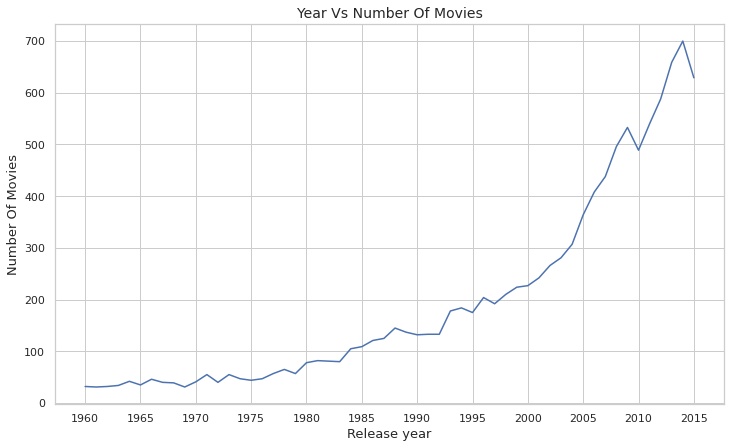

In [52]:
# make group for each year and count the number of movies in each year 
data=df.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(12,7)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")



> **After Seeing the plot and the output we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).**





###**Research Question 2 : Which Movie Had The most profit in the year 2000-2005?**

In [53]:

#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
small_df=df.loc[(df.release_year>= 2000) & (df.release_year <= 2005)]
small_df['Profit'] = small_df['revenue'] - small_df['budget']

#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.

def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = small_df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = small_df[x].idxmax()
    high = pd.DataFrame(small_df.loc[high_index,:])
    low = pd.DataFrame(small_df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",small_df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",small_df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.

find_minmax('Profit')




Movie Which Has Highest Profit :  The Lord of the Rings: The Return of the King
Movie Which Has Lowest Profit  :  The Alamo


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,4949,7031
id,122,10733
imdb_id,tt0167260,tt0318974
popularity,7.12246,0.94856
budget,94000000,145000000
revenue,1118888979,25819961
original_title,The Lord of the Rings: The Return of the King,The Alamo
cast,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...
homepage,http://www.lordoftherings.net,NaN
director,Peter Jackson,John Lee Hancock
tagline,The eye of the enemy is moving.,You will never forget




> The first column shows the highest profit made by a movie and second column shows the highest in loss movie in this dataset during the release_year 2000 to 2005



> As we can see that 'The Lord of the Rings: The Return of the King	' movie Directed by Peter Jackson earn the highest profit in duration years, making over 1.02B in profit in this dataset.And the most in loss movie in this dataset is The Alamo going in loss by more than 119M was directed by Singmoo Lee.





##**Research Question 3 : Movies with Second highest And Second Lowest Budget?**

In [72]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('budget')  

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
imdb_id,tt1032751,tt2165765
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
homepage,http://www.iamrogue.com/thewarriorsway,http://www.fearclinicmovie.com/
director,Sngmoo Lee,Robert Hall
tagline,Assassin. Hero. Legend.,NaN


ValueError: ignored

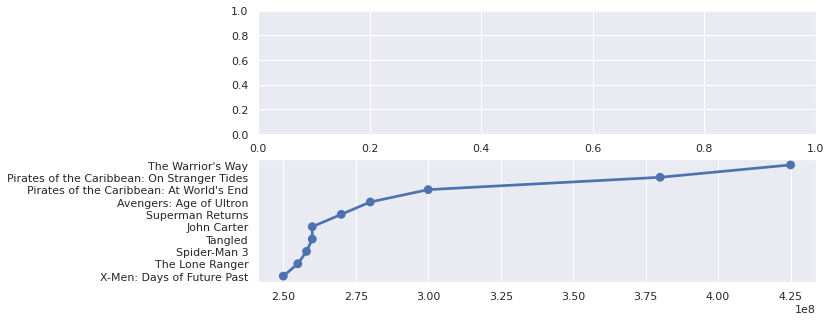

In [78]:
#make a first plot which contain top 10 highest budget movies.
#make a second plot which contain top 10 lowest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe 1
#sort the 'budget' column in ascending order and store it in the new dataframe 2

info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))


info_low = pd.DataFrame(df['budget'].sort_values(ascending = True))
info_low['original_title'] = df['original_title']
data_low = list(map(str,(info_low['original_title'])))


#extract the top 10 budget movies data from the list and dataframe.
#extract the lowest 10 budget movies data from the list and dataframe in ascendind order.

x = list(info['budget'][:10])
y = list(data[:10])
a = list(info_low['budget'][:10])
b = list(data_low[:10])


#plot the figure and setup the title and labels.
fig,ax=plt.subplots(2)
ax[0] = sns.pointplot(x=x,y=y)
ax[1] = sns.pointplot(x=x1,y=y1)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget and low budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")




##**Research Question 4 : Movie with Most And Least Earned Revenue?**


In [79]:
#find the movie with highest and lowest earned revenue
#use 'find_minmax' function which i made earlier
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
imdb_id,tt0499549,tt2231253
popularity,9.43277,2.93234
budget,2.37e+08,3e+07
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
homepage,http://www.avatarmovie.com/,NaN
director,James Cameron,Simon West
tagline,Enter the World of Pandora.,Never bet against a man with a killer hand.




> The first column shows the highest revenue made by a movie and second column shows the lowest revenue movie in this dataset. As we can see that 'Avatar' movie Directed by James Cameron made the highest revenue in all, making over 2.78B revenue in this dataset. And the movie which made lowest revenue is 'Wild Card' directed by Simon West.



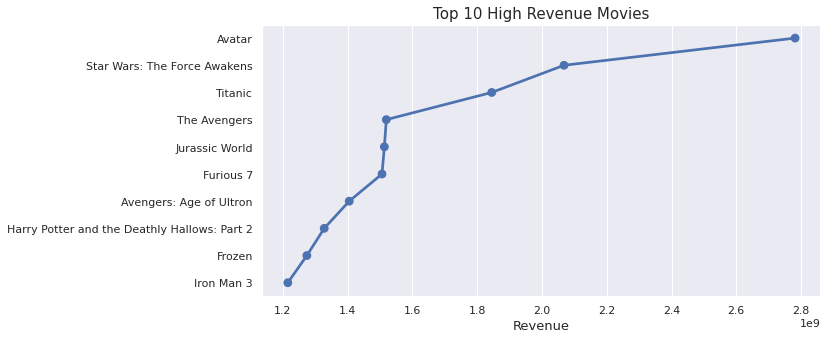

In [82]:
#tplotting top 10 movies whiv=ch made highest revenues
#sort the revenue column in descending order and store in new dataframe
info = pd.DataFrame(df['revenue'].sort_values(ascending=False))
info['original_title'] = df['original_title']
data=list(map(str,info['original_title']))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax=sns.pointplot(x=y , y=x)
sns.set(rc = {'figure.figsize': (10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")





> After Seeing the plot and the output we can conclude that year Movie Avatar has the highest revenue followed by year Star Wars and Titanic.






##**Research Question 5 : Average runtime of movies in the year 2000**

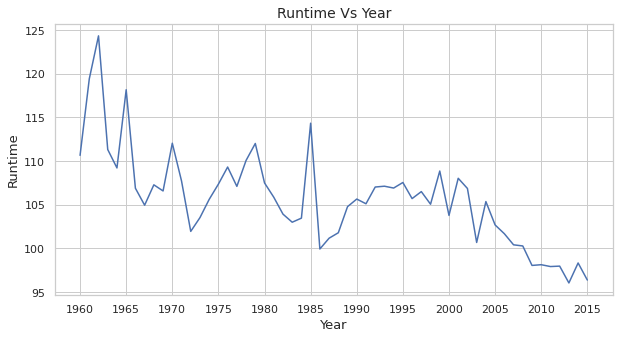

In [88]:
# In this cell i am going to show how the runtime of movies differ from year to year.

#make the group of the data acoording to their release_year andand find the ma=ean related to this and plot.
df.groupby('release_year').mean()['runtime'].plot(xticks=np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize' : (15,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")



## According to the plot movie duration is decreasing year to year and it's TRUE. Because at this time nobody want to watch the long duration movies because it is quite boring. That's why the average runtime duraion of the movies are arround 100 Minutes.
### from the plot we can see that the average runtime of movie in the year 2000 is around 105 min which is not wrong following the current scenario.

#**Conclusions**



*  Performed data cleaning
*  Exploratory data analysis on the dataset

*  Got to know which year has highest release of movies
*  movie having lowest and highest profit
*  Movies having Most and Least Budget
*  Movies having Largest and Lowest earned Revenue

*  Average Runtime of movies


*last but not the least learnt about various new techniques.*


